<a href="https://colab.research.google.com/github/tanvir-talha058/Machine-Learning/blob/main/ResNet50.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Found 3299 images belonging to 4 classes.
Found 820 images belonging to 4 classes.
Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


104/104 ━━━━━━━━━━━━━━━━━━━━ 472s 4s/step - accuracy: 0.3685 - loss: 1.3320 - val_accuracy: 0.2805 - val_loss: 1.4677 - learning_rate: 1.0000e-04
Epoch 2/20
104/104 ━━━━━━━━━━━━━━━━━━━━ 154s 1s/step - accuracy: 0.3783 - loss: 1.2504 - val_accuracy: 0.1024 - val_loss: 1.6155 - learning_rate: 1.0000e-04
Epoch 3/20
104/104 ━━━━━━━━━━━━━━━━━━━━ 118s 1s/step - accuracy: 0.4498 - loss: 1.1806 - val_accuracy: 0.0707 - val_loss: 1.6471 - learning_rate: 1.0000e-04
Epoch 4/20
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 829ms/step - accuracy: 0.4473 - loss: 1.1457
Epoch 4: ReduceLROnPlateau reducing learning rate to 4.999999873689376e-05.
104/104 ━━━━━━━━━━━━━━━━━━━━ 118s 1s/step - accuracy: 0.4474 - loss: 1.1455 - val_accuracy: 0.0488 - val_loss: 1.8071 - learning_rate: 1.0000e-04
Epoch 5/20
104/104 ━━━━━━━━━━━━━━━━━━━━ 142s 1s/step - accuracy: 0.4662 - loss: 1.1034 - val_accuracy: 0.0415 - val_loss: 1.8460 - learning_rate: 5.0000e-05
Epoch 6/20
104/104 ━━━━━━━━━━━━━━━━━━━━ 158s 1s/step - accuracy: 0.4640 -

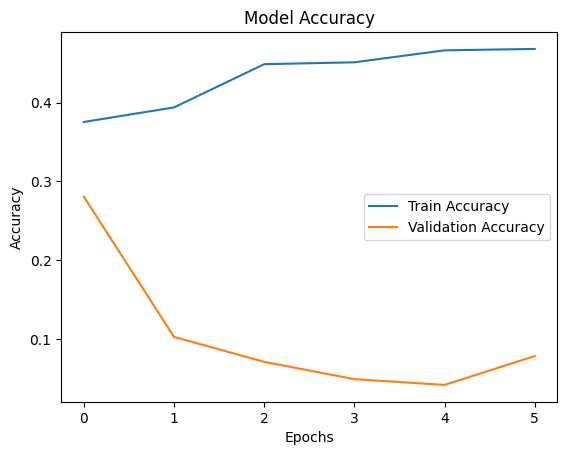

In [11]:
# Step 1: Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Step 2: Set Dataset Paths
train_dir = '/content/drive/My Drive/dataset/train'  # Update to your train folder
val_dir = '/content/drive/My Drive/dataset/validation'      # Update to your validation folder

# Step 3: Install TensorFlow (if not already installed)
!pip install tensorflow

# Step 4: Import Necessary Libraries
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Step 5: Data Preprocessing
datagen = ImageDataGenerator(rescale=1.0 / 255)

train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

val_generator = datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

# Step 6: Load Pre-trained ResNet-50 Model
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze base model layers
for layer in base_model.layers:
    layer.trainable = False

# Add Custom Layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
x = Dense(128, activation='relu')(x)
num_classes = train_generator.num_classes
predictions = Dense(num_classes, activation='softmax')(x)

# Combine the model
model = Model(inputs=base_model.input, outputs=predictions)

# Step 7: Compile the Model
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Step 8: Define Callbacks
callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1)
]

# Step 9: Train the Model
history = model.fit(
    train_generator,
    epochs=20,
    validation_data=val_generator,
    callbacks=callbacks
)

# Step 10: Save the Model
model.save('/content/drive/My Drive/leaf_disease_detection_resnet50.h5')

# Step 11: Plot Training Results
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


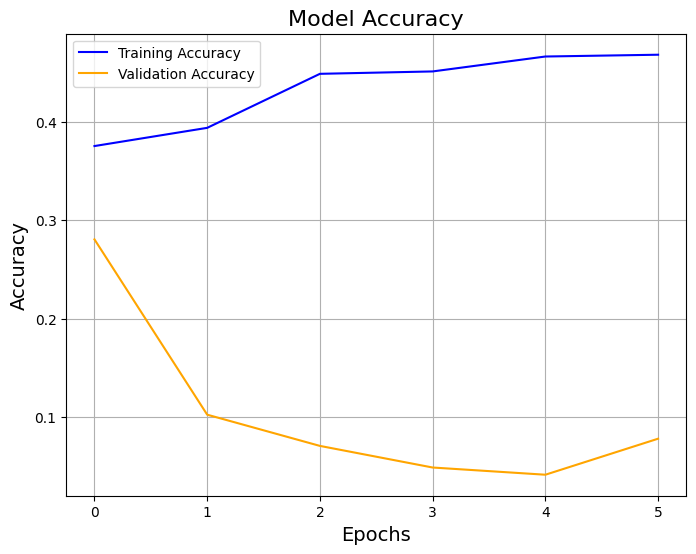

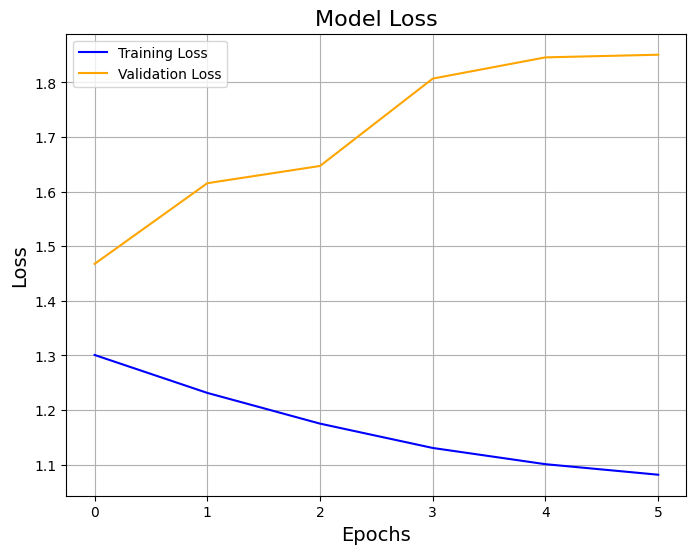

26/26 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step


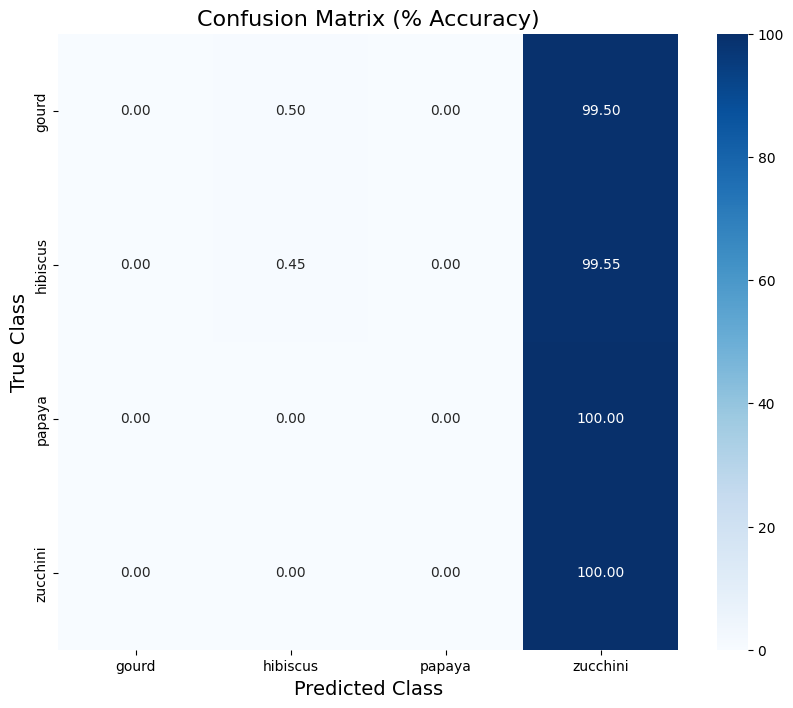

26/26 ━━━━━━━━━━━━━━━━━━━━ 25s 950ms/step
Classification Report:

              precision    recall  f1-score   support

       gourd       0.00      0.00      0.00       200
    hibiscus       1.00      0.01      0.02       220
      papaya       0.00      0.00      0.00       170
    zucchini       0.28      1.00      0.44       230

    accuracy                           0.28       820
   macro avg       0.32      0.25      0.11       820
weighted avg       0.35      0.28      0.13       820



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [12]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Plot Training and Validation Accuracy
def plot_accuracy(history):
    plt.figure(figsize=(8, 6))
    plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='orange')
    plt.title('Model Accuracy', fontsize=16)
    plt.xlabel('Epochs', fontsize=14)
    plt.ylabel('Accuracy', fontsize=14)
    plt.legend()
    plt.grid(True)
    plt.show()

# Plot Training and Validation Loss
def plot_loss(history):
    plt.figure(figsize=(8, 6))
    plt.plot(history.history['loss'], label='Training Loss', color='blue')
    plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
    plt.title('Model Loss', fontsize=16)
    plt.xlabel('Epochs', fontsize=14)
    plt.ylabel('Loss', fontsize=14)
    plt.legend()
    plt.grid(True)
    plt.show()

# Confusion Matrix Visualization
def plot_confusion_matrix(generator, model):
    # Get true labels and predictions
    true_labels = generator.classes
    class_names = list(generator.class_indices.keys())
    generator.reset()
    predictions = model.predict(generator, verbose=1)
    predicted_labels = np.argmax(predictions, axis=1)

    # Generate confusion matrix
    cm = confusion_matrix(true_labels, predicted_labels)
    cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

    # Plot the confusion matrix
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm_percentage, annot=True, fmt=".2f", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
    plt.title('Confusion Matrix (% Accuracy)', fontsize=16)
    plt.xlabel('Predicted Class', fontsize=14)
    plt.ylabel('True Class', fontsize=14)
    plt.show()

# Classification Report
def print_classification_report(generator, model):
    true_labels = generator.classes
    class_names = list(generator.class_indices.keys())
    generator.reset()
    predictions = model.predict(generator, verbose=1)
    predicted_labels = np.argmax(predictions, axis=1)

    # Generate classification report
    report = classification_report(true_labels, predicted_labels, target_names=class_names)
    print("Classification Report:\n")
    print(report)

# Call the functions for visualization
plot_accuracy(history)
plot_loss(history)
plot_confusion_matrix(val_generator, model)
print_classification_report(val_generator, model)
